
# Estadística Descriptiva   
**Dataset:** `insurance_claims.csv` (Mendeley Data)  
**Objetivo:** Entender la estructura estadística básica de la siniestralidad antes de pasar a inferencia / modelado.
##### https://www.kaggle.com/datasets/mian91218/insurance-claims
---

## Guía de lectura
1. Importamos y exploramos el dataset real de siniestros.
2. Calculamos medidas descriptivas: tendencia central, dispersión, percentiles.
3. Analizamos la forma de la distribución: asimetría, curtosis, colas.
4. Visualizamos histograma, boxplot y versión logarítmica.
5. Extraemos algunas conclusiones preliminares



## Importación de librerías y datos

En esta sección:
- Cargamos el dataset real de siniestros (`insurance_claims.csv`).
- Vemos la estructura (columnas, tipos de datos).
- Confirmamos cuántas observaciones tenemos.

Antes de ejecutar esta celda asegúrate de haber subido el archivo `insurance_claims.csv` a tu entorno (por ejemplo en Colab: carpeta de la sesión).


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
claims = pd.read_csv("insurance_claims.csv")

In [ ]:
claims.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [ ]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    


## Tipos de variables: qué mide cada cosa

No todas las variables se analizan igual.  

- **Cualitativas nominales** (texto / categoría sin orden):  
  Ej: `fraud_reported`, `insured_sex`, `incident_type`, `collision_type`.  
  → Usamos frecuencias, proporciones, moda.

- **Cualitativas ordinales** (categorías ordenadas):  
  Ej: `incident_severity` (por ejemplo: `Minor Damage` < `Major Damage` < `Total Loss`).  
  → Podemos hablar de “más severo / menos severo”.

- **Cuantitativas discretas** (conteos):  
  Ej: `number_of_vehicles_involved`, `bodily_injuries`, `witnesses`.  
  → Número entero de vehículos implicados, testigos, lesionados.

- **Cuantitativas continuas** (euros, montos):  
  Ej: `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim`.  
  → Valores monetarios (severidad).

Identificar este tipo es fundamental porque:
- Nos dice qué estadísticos tienen sentido (media sí / no).
- Nos dice qué gráficos usar (histograma vs barras).


In [ ]:
claims.dtypes

,0
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64



## 3. Variable clave: `total_claim_amount`

Vamos a centrarnos en la severidad del siniestro, es decir, el **importe total reclamado** (`total_claim_amount`).  
Esta es, en términos actuariales, la variable económica de interés.

Calcularemos:
- Media, mediana, moda → tendencia central
- Varianza, desviación estándar, rango, IQR → dispersión
- Percentiles → posición relativa
- Asimetría y curtosis → forma de la distribución


In [ ]:
# Tendencia central

media = claims["total_claim_amount"].mean()
media

np.float64(52761.94)

In [ ]:
media=claims["total_claim_amount"].mean()
mediana=claims["total_claim_amount"].median()
moda=claims["total_claim_amount"].mode()[0]

print(media)
print(mediana)
print(moda)

52761.94
58055.0
59400


In [ ]:
#Dispersión
varianza = claims["total_claim_amount"].var()
desv_std = claims["total_claim_amount"].std()
rango = claims["total_claim_amount"].max() - claims["total_claim_amount"].min()
iqr = claims["total_claim_amount"].quantile(0.75) - claims["total_claim_amount"].quantile(0.25)

print(varianza)
print(desv_std)
print(rango)
print(iqr)

697040954.7911898
26401.53319016132
114820
28780.0


In [ ]:
p10= claims["total_claim_amount"].quantile(0.10)
p50= claims["total_claim_amount"].quantile(0.50)
p90= claims["total_claim_amount"].quantile(0.90)
print(p10)
print(p50)
print(p90)

5756.0
58055.0
81364.0


In [ ]:
#Formas
asimetria = claims["total_claim_amount"].skew()
curtosis = claims["total_claim_amount"].kurt()
print("asimetria:", asimetria)
print("curtosis:", curtosis)

asimetria: -0.594581988510234
curtosis: -0.45408142669809326


In [ ]:
claims.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
claims["total_claim_amount"].describe()

,total_claim_amount
count,1000.00000
mean,52761.94000
std,26401.53319
min,100.00000
25%,41812.50000
50%,58055.00000
75%,70592.50000
max,114920.00000



## 4. Visualización de la severidad: histograma y boxplot

- El **histograma** nos muestra la frecuencia de diferentes rangos de importe.  
- El **boxplot** nos deja ver de forma directa la mediana, el rango intercuartílico y los outliers.

Si vemos muchos puntos alejados del “bigote” superior del boxplot, no es necesariamente error: son siniestros grandes (pérdidas severas) que importan muchísimo económicamente.


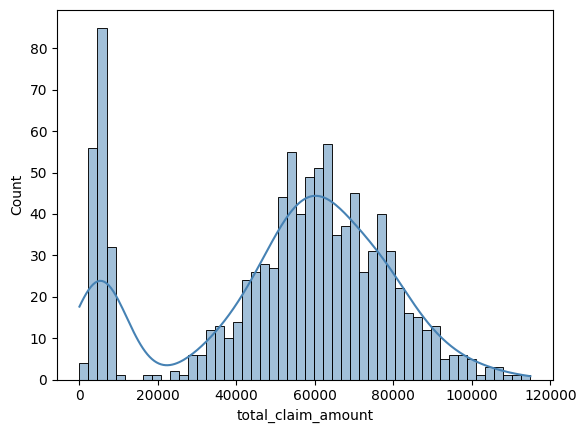

In [ ]:
sns.histplot(claims, x="total_claim_amount", bins=50, kde=True, color="steelblue")
plt.show()

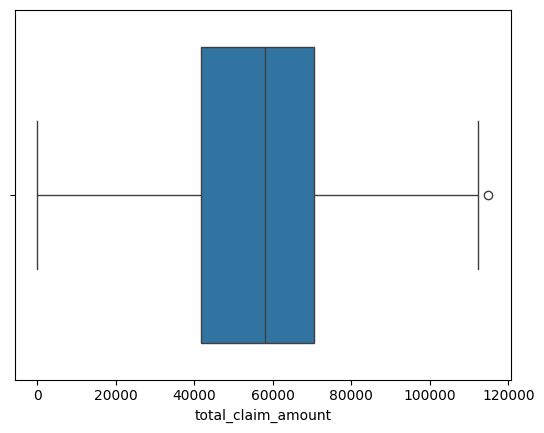

In [ ]:
sns.boxplot(claims, x="total_claim_amount")
plt.show()


## 5. Transformación logarítmica

Problema: `total_claim_amount` es muy asimétrica.  
Solución típica en análisis actuarial y modelos GLM: aplicar logaritmo.

Vamos a crear `log_claim = log(total_claim_amount + 1)` y mirar su forma.

**Por qué +1?**  
Para evitar log(0) si hay siniestros con importe 0 / simbólico.


In [ ]:
claims["log_claim"] = np.log(claims["total_claim_amount"]+1)

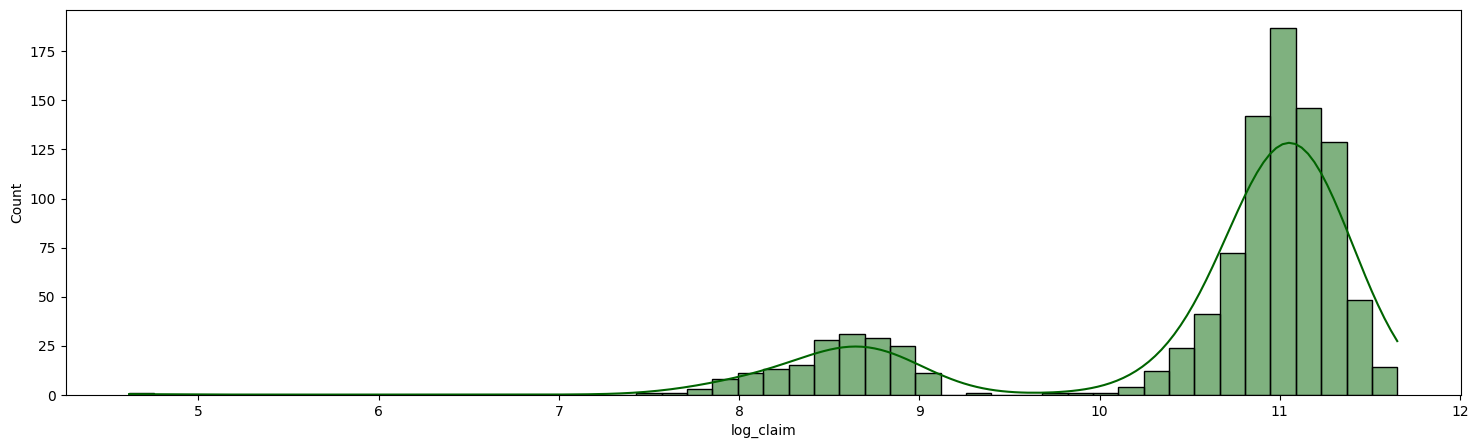

-1.6605098039725132
1.8563326705503882


In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(claims["log_claim"], bins=50, kde=True, color="darkgreen")
plt.show()

print(claims["log_claim"].skew())
print(claims["log_claim"].kurt())


## 6. Segmentación por severidad declarada del siniestro

Hipótesis actuarial:  
> La multimodalidad (varios picos) viene de mezclar siniestros leves con siniestros severos.

Vamos a comprobar si la distribución de `log_claim` cambia según `incident_severity`.  
Si cada grupo tiene una forma más “limpia”, eso confirma que estamos mezclando poblaciones distintas.


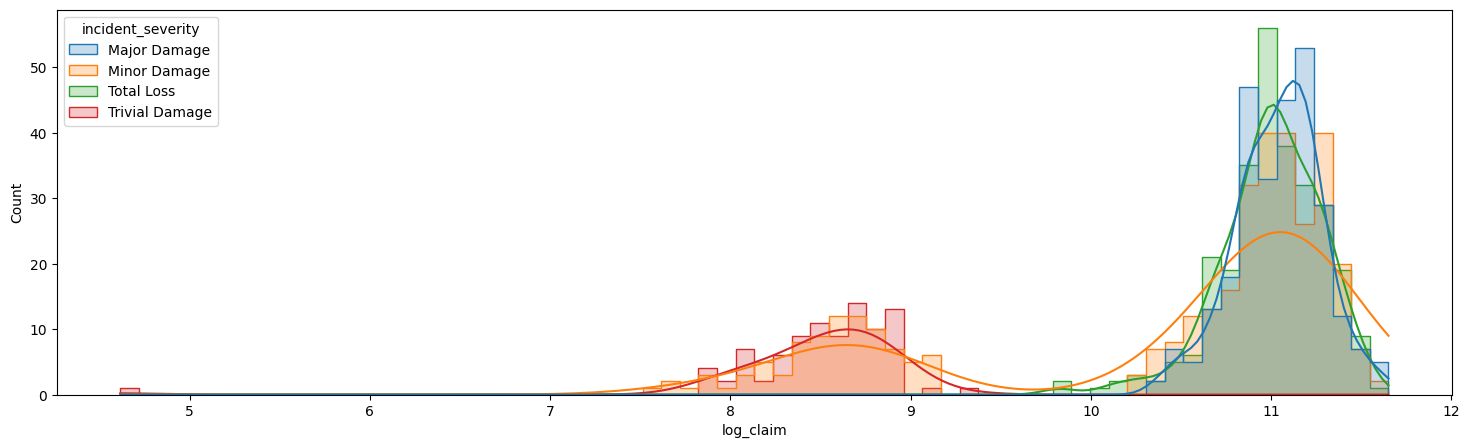

In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(data=claims, x="log_claim", kde=True, element="step", stat="count", common_norm=False, hue="incident_severity")

plt.show()


## 7. Resumen estadístico con `.describe()`

`.describe()` nos da en una sola tabla:
- media (mean),
- desviación estándar (std),
- min y max,
- cuartiles (25%, 50%, 75%).

Vamos a usarlo sobre las columnas económicas principales.


In [ ]:
claims[['total_claim_amount','injury_claim','property_claim','vehicle_claim']].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,52761.94000,7433.420000,7399.570000,37928.950000
std,26401.53319,4880.951853,4824.726179,18886.252893
min,100.00000,0.000000,0.000000,70.000000
25%,41812.50000,4295.000000,4445.000000,30292.500000
50%,58055.00000,6775.000000,6750.000000,42100.000000
75%,70592.50000,11305.000000,10885.000000,50822.500000
90%,81364.00000,14380.000000,14142.000000,58728.000000
95%,88413.00000,15662.000000,15540.000000,63094.500000
99%,101018.50000,17682.000000,19471.800000,73263.600000



### Lectura final de la tabla descriptiva

- Los percentiles altos (90%, 95%, 99%) muestran cuánto crecen las colas.  
  Esa “cola” es la parte del negocio que puede comprometer rentabilidad si no está bien tarifada o reasegurada.

- `injury_claim` vs `property_claim` vs `vehicle_claim` nos dejan ver qué componente (lesiones personales, daños a la propiedad, daños al vehículo) empuja realmente el coste total.  
  Ejemplo típico: las lesiones personales suelen ser las más volátiles y litigiosas.

➡ Insight actuarial:
- La siniestralidad tiene **alta volatilidad y concentración de coste en pocos casos extremos**.
- Hay evidencias claras de **subpoblaciones de siniestros** con comportamientos muy distintos.
- Esto prepara el terreno para la siguiente fase: **Estadística Inferencial**.

En inferencia responderemos preguntas del tipo:
- ¿Las medias de severidad difieren de forma significativa entre tipos de siniestro?
- ¿Hay asociación entre `fraud_reported` y ciertos patrones de importe?
- ¿Podemos cuantificar con rigor estadístico que los siniestros severos son "distintos"?
